Task 2: Predict Future Stock Prices

In [5]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
data = yf.download('AAPL', period='2y')
data.head()

data['Target'] = data['Close'].shift(-1)

data = data.dropna()

features = ['Open', 'High', 'Low', 'Volume']  # Can add 'Close', 'MA5', etc.

# Create input (X) and output (y)
X = data[features]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


/tmp/ipython-input-6-2412941197.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', period='2y')
[*********************100%***********************]  1 of 1 completed


In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [8]:
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print results
print("Linear Regression R^2 Score:", r2_lr)
print("Linear Regression RMSE:", rmse_lr)
print("\nRandom Forest R^2 Score:", r2_rf)
print("Random Forest RMSE:", rmse_rf)

Linear Regression R^2 Score: 0.8921921005223424
Linear Regression RMSE: 5.55876115236767

Random Forest R^2 Score: 0.7980076162878864
Random Forest RMSE: 7.60887095751098


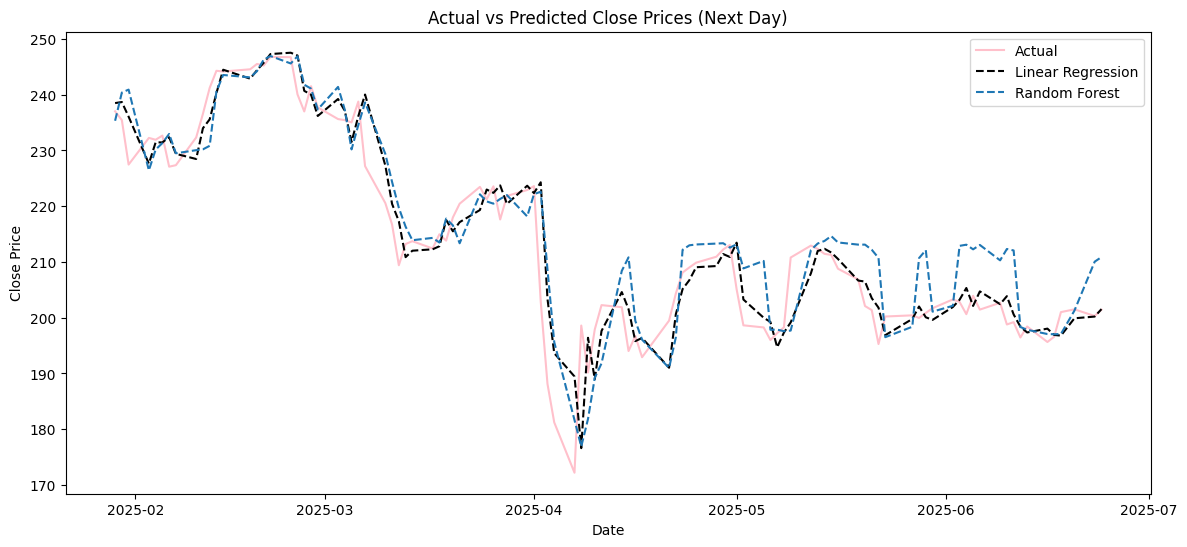

In [11]:
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual', color='pink')
plt.plot(y_test.index, y_pred_lr, label='Linear Regression', linestyle='--', color='black')
plt.plot(y_test.index, y_pred_rf, label='Random Forest', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Prices (Next Day)")
plt.legend()
plt.show()
